### Name: Devindi De Silva
### Index number: 190128H

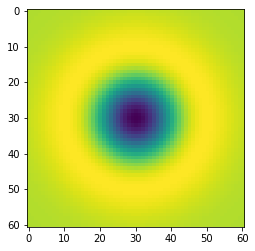

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sigma =10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+ Y**2/(sigma**2)-2)*np.exp(-(X**2+ Y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

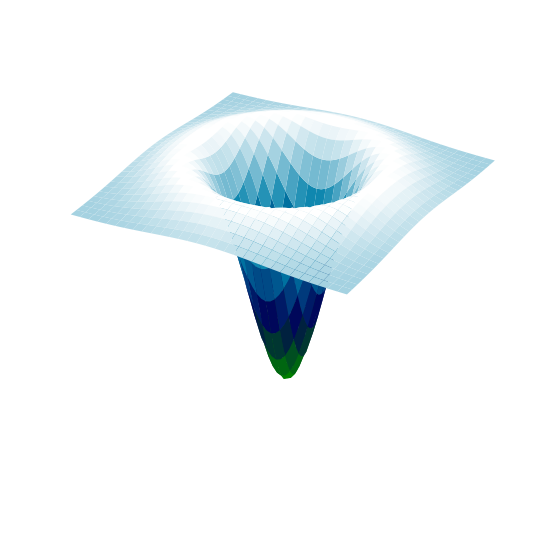

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')

surf=ax.plot_surface(X,Y,log,cmap=cm.ocean,linewidth=0,antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

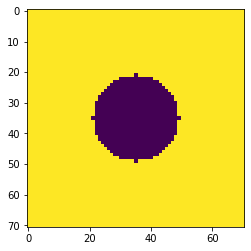

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w,h = 71, 71
hw = w//2
hh = h//2

f=np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r=w//5
f*=X**2+Y**2> r**2

plt.imshow(f)
plt.show()

(35, 35, 5)
10


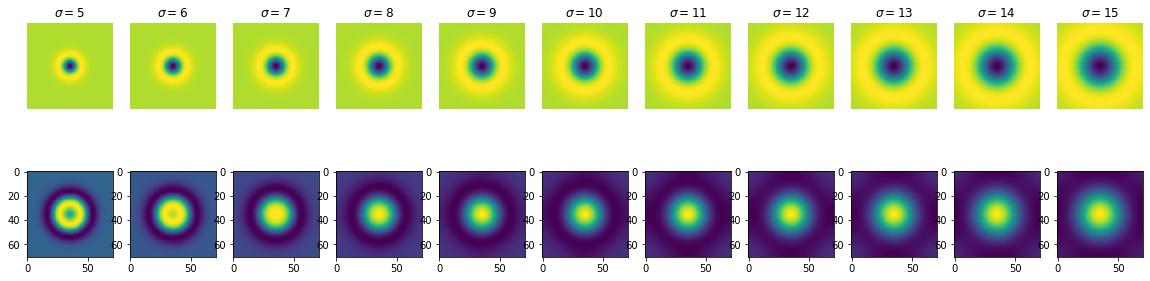

In [13]:
s=11
fig, ax = plt.subplots(2,s, figsize=(20,5))
scale_space =  np.empty((h,w,s), dtype=np.float32)
sigmas=np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*sigma
    X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+ Y**2/(sigma**2)-2)*np.exp(-(X**2+ Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis("off")
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
indices = np.unravel_index(np.argmax(scale_space,axis=None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])


Scalar space extremum get to a maximum when $r=2^{0.5}\sigma$ . We have taken r as 14 initialy. Therefore, the maximum scalar space must be given when $\sigma=14/(2^{0.5})=9.89==>10$

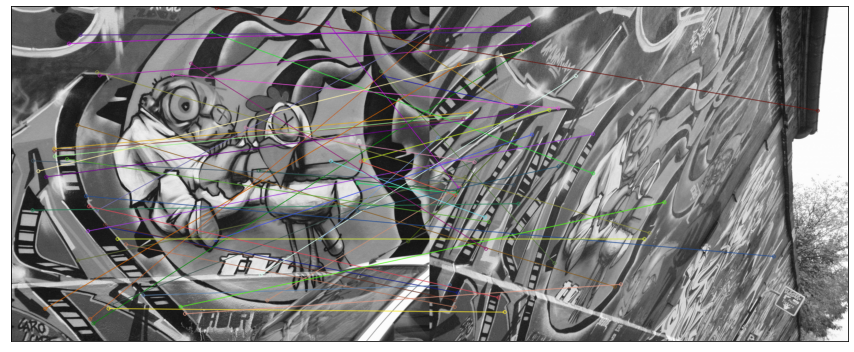

In [17]:
import cv2 
import matplotlib.pyplot as plt

img1 = cv.imread(r"img1.ppm",cv.IMREAD_COLOR)         # queryImage
img2 = cv.imread(r"img6.ppm",cv.IMREAD_COLOR) # trainImage

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()

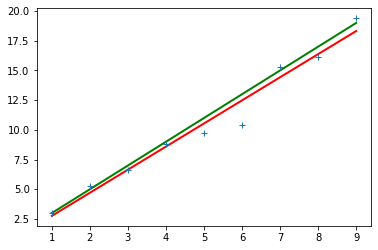

In [18]:
import numpy as np
import matplotlib.pyplot as plt

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noise = sigma*np.random.randn(len(x))
#n = 2.*np . random. randn ( len ( x ) )
o = np . zeros ( x . shape )
#o[-1] = 20
y = m*x + c + noise + o

n=len(x)
X=np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B= np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar =B[1]

plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[m*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimated line')
plt.plot(x,y,'+',label = "Noisy points")
plt.show()

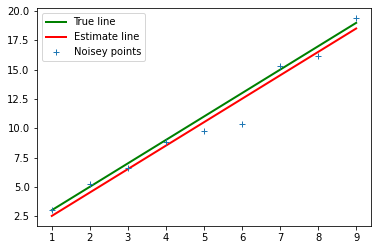

In [20]:
import numpy as np
import matplotlib.pyplot as plt

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noice=sigma*np.random.randn(len(x))
#n = 2.*np . random. randn ( len ( x ) )
o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + noice + o

n=len(x)

u11=np.sum((x-np.mean(x))**2)
u12=np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22=np.sum((y-np.mean(y))**2)

U=np.array([[u11,u12],[u21,u22]])
W,V=np.linalg.eig(U)

ev_corresponding_to_smalest_ev=V[:,np.argmin(W)]

a=ev_corresponding_to_smalest_ev[0]
b=ev_corresponding_to_smalest_ev[1]
d=a*np.mean(x)+b*np.mean(y)

mstar=-a/b
cstar=d/b

plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimate line')
plt.plot(x,y,'+',label = "Noisey points")
plt.legend(loc='best')